In [1]:
ls ../rawdata/starmap/

SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_spliced.coutb.tsv.gz
SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_spliced.coutc.tsv.gz
SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_spliced.coutt.tsv.gz
SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_total.coutb.tsv.gz
SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_total.coutc.tsv.gz
SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_total.coutt.tsv.gz
SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_unspliced.coutb.tsv.gz
SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_unspliced.coutc.tsv.gz
SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_unspliced.coutt.tsv.gz
SvdB13a1-2-Tomo-120hAA-hGstrlds79-19052018-ChiSB43_cbc_trimmed_star_ie2_spliced.coutb.tsv.gz
SvdB13a1-2-Tomo-120hAA-hGstrlds79-19052018-ChiSB43_cbc_trimmed_star_ie

# Important functions

In [7]:
def readData(filename):
    dfc = read_csv(filename + '.coutc.tsv.gz', sep = '\t', index_col=0)
    dfb = read_csv(filename + '.coutb.tsv.gz', sep = '\t', index_col=0)
    dft = read_csv(filename + '.coutt.tsv.gz', sep = '\t', index_col=0)
    dfc.columns = [c.zfill(3) for c in dfc.columns]; 
    dfb.columns = [c.zfill(3) for c in dfb.columns]; 
    dft.columns = [c.zfill(3) for c in dft.columns]; 
    dfc = dfc[sorted(dfc.columns)]; 
    dfb = dfb[sorted(dfb.columns)]
    dft = dft[sorted(dft.columns)]
    dfc = dfc[dfc.columns[:97]]
    dfb = dfb[dfb.columns[:97]]
    dft = dft[dft.columns[:97]]
    return dfc, dfb, dft

In [3]:
def getPlotTotalReads(df):
    ercc = [idx for idx in df.index if 'ERCC' in idx]
    mt = [idx for idx in df.index if '_chrM' in idx]
    if len(mt) == 0:
        mt = [idx for idx in df.index if '_MT' in idx]
    genes = [idx for idx in df.index if idx not in ercc and idx not in mt]
    plt.bar(range(len(df.columns)), df.loc[genes].sum()+1, log = 'y')
    plt.bar(range(len(df.columns)), df.loc[mt].sum()+1, log = 'y')
    plt.bar(range(len(df.columns)), df.loc[ercc].sum()+1, log = 'y')
    plt.xticks(range(len(df.columns)), df.columns)
    plt.ylabel('total')
    plt.xlabel('well')
    plt.legend(['genes', 'mt', 'ercc'])
    return plt

In [4]:
def getCBT(dfs):
    dfc, dfb, dft = dfs
    fig = plt.figure(figsize=(15,4))
    plt.subplot(131)
    plt1 = getPlotTotalReads(dfc)
    plt1.title('counts')
    plt.subplot(132)
    plt2 = getPlotTotalReads(dfb)
    plt2.title('barcodes')
    plt.subplot(133)
    plt3 = getPlotTotalReads(dft)
    plt3.title('transcripts')
    return plt.show()

In [5]:
def splitGst(dfs, col):
    return [df[col] for df in dfs]

# Read data

In [8]:
# spliced
f = '../rawdata/starmap/SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_spliced'
df1s = readData(f)
f = '../rawdata/starmap/SvdB13a1-2-Tomo-120hAA-hGstrlds79-19052018-ChiSB43_cbc_trimmed_star_ie2_spliced'
df2s = readData(f)
f = '../rawdata/starmap/SvdB13a1-3-Tomo-72hAA-hGstrlds43-56-17052018-Chi_cbc_trimmed_star_ie2_spliced'
df3s = readData(f)
# unspliced
f = '../rawdata/starmap/SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_star_ie2_unspliced'
df1u = readData(f)
f = '../rawdata/starmap/SvdB13a1-2-Tomo-120hAA-hGstrlds79-19052018-ChiSB43_cbc_trimmed_star_ie2_unspliced'
df2u = readData(f)
f = '../rawdata/starmap/SvdB13a1-3-Tomo-72hAA-hGstrlds43-56-17052018-Chi_cbc_trimmed_star_ie2_unspliced'
df3u = readData(f)

# Reads

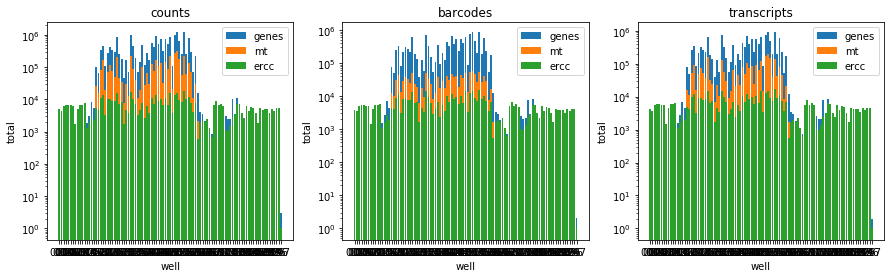

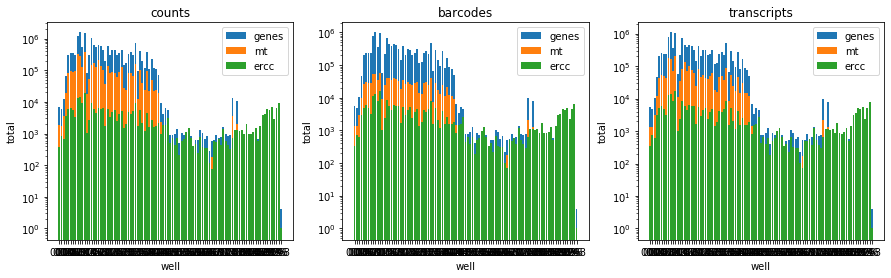

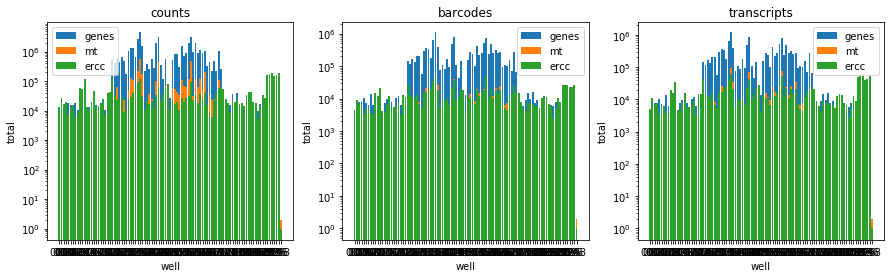

In [9]:
# star spliced
getCBT(df1s)
getCBT(df2s)
getCBT(df3s)

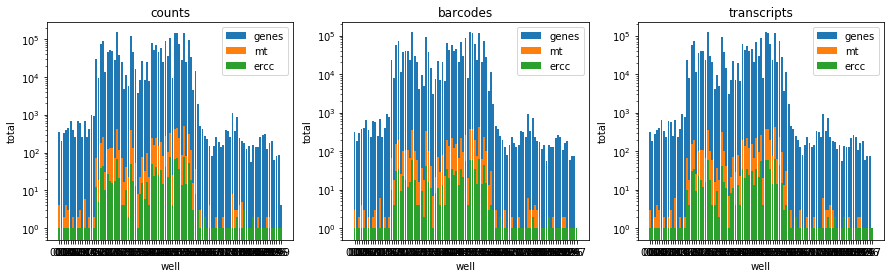

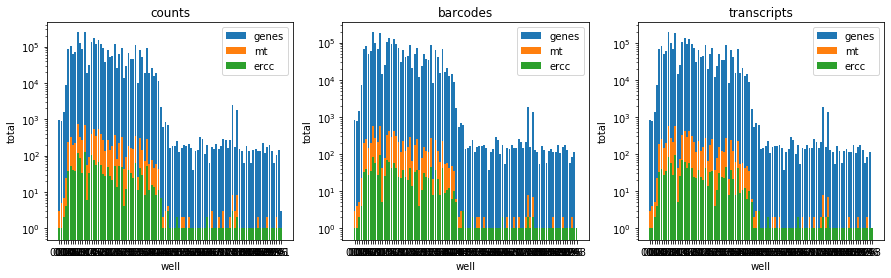

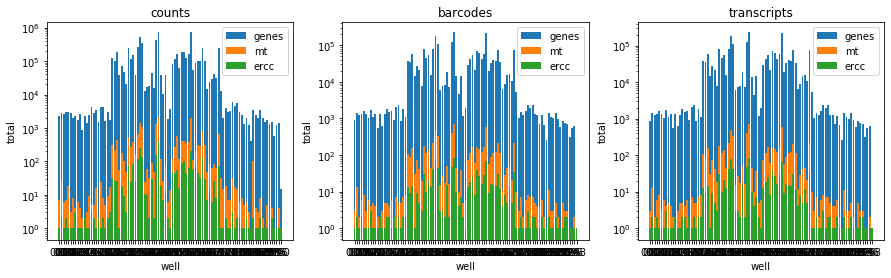

In [10]:
# star unspliced
getCBT(df1u)
getCBT(df2u)
getCBT(df3u)

# remove some genes

In [11]:
def removeGenes(df):
    genes = ['ERCC','__MT', 'KCNQ1OT1', 'LARS2','MALAT1', '_RPL', '_RPS','__MT']
    exclude = [idx for idx in df.index for g in genes if g in idx]
    df = df.loc[df.index[df.sum(axis=1)>0]]
    return df.loc[[idx for idx in df.index if idx not in exclude]]

In [12]:
def removeGenesDFS(dfs):
    return [removeGenes(df) for df in dfs]

In [13]:
# remove some genes
rdfu1 = removeGenesDFS(df1u)
rdfu2 = removeGenesDFS(df2u)
rdfu3 = removeGenesDFS(df3u)

rdfs1 = removeGenesDFS(df1s)
rdfs2 = removeGenesDFS(df2s)
rdfs3 = removeGenesDFS(df3s)


# QC plots

In [18]:
print(rdfs1[-1].columns[rdfs1[-1].sum()>1e4])
print(rdfs2[-1].columns[rdfs2[-1].sum()>2e4])
print(rdfs3[-1].columns[rdfs3[-1].sum()>5e4])

Index(['017', '018', '019', '020', '021', '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031', '032', '033', '034', '035', '036',
       '037', '038', '039', '040', '041', '042', '043', '044', '045', '046',
       '047', '048', '049', '050', '051', '052', '053', '054', '055', '056',
       '057', '058', '059', '060', '061'],
      dtype='object')
Index(['004', '005', '006', '007', '008', '009', '010', '011', '012', '013',
       '014', '015', '016', '017', '018', '019', '020', '021', '022', '023',
       '024', '025', '026', '027', '028', '029', '030', '031', '032', '033',
       '034', '035', '036', '037', '038', '039', '040', '041', '042', '043',
       '044'],
      dtype='object')
Index(['024', '025', '026', '027', '028', '029', '031', '032', '033', '034',
       '035', '036', '037', '038', '039', '040', '041', '042', '043', '044',
       '045', '047', '050', '051', '052', '053', '054', '055', '056', '057',
       '058', '059', '060', '061', '062', '063', '0

In [19]:
col_mg01 = [str(i).zfill(3) for i in range(7, 71)]
col_mg02 = [str(i).zfill(3) for i in range(1, 48)]
col_mg03 = [str(i).zfill(3) for i in range(20, 50)]
col_mg04 = [str(i).zfill(3) for i in range(48, 76)]

In [20]:
dfu_g1 = splitGst(rdfu1, col_mg01)
dfu_g2 = splitGst(rdfu2, col_mg02)
dfu_g3 = splitGst(rdfu3, col_mg03)
dfu_g4 = splitGst(rdfu3, col_mg04)

dfs_g1 = splitGst(rdfs1, col_mg01)
dfs_g2 = splitGst(rdfs2, col_mg02)
dfs_g3 = splitGst(rdfs3, col_mg03)
dfs_g4 = splitGst(rdfs3, col_mg04)

They are all anterior=posterior according to CDX2 expression

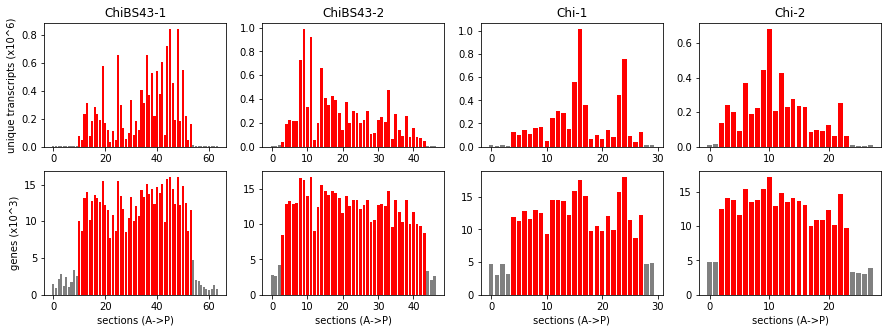

In [21]:
plt.figure(figsize=(15,5))

titles = ['ChiBS43-1', 'ChiBS43-2', 'Chi-1', 'Chi-2']
thresholds = [6e3, 6e3, 6e3, 6e3]

for i, df in enumerate([dfs_g1, dfs_g2, dfs_g3, dfs_g4]):
    plt.subplot(2,4,i+1)
    plt.bar(range(len(df[-1].columns)), df[-1].sum()/1e6, color = 'red')
    plt.bar(range(len(df[-1].columns)), ((df[-1]>0).sum()<thresholds[i])*(df[-1].sum()/1e6), color = 'gray')

    if i == 0:
        plt.ylabel('unique transcripts (x10^6)')
    plt.title(titles[i])

for i, df in enumerate([dfs_g1, dfs_g2, dfs_g3, dfs_g4]):
    plt.subplot(2,4,i+5)
    plt.bar(range(len(df[-1].columns)), (df[-1]>0).sum()/1e3, color = 'red')
    plt.bar(range(len(df[-1].columns)), ((df[-1]>0).sum()<thresholds[i])*(df[-1]>0).sum()/1e3, color = 'gray')

    if i == 0:
        plt.ylabel('genes (x10^3)')
    plt.xlabel('sections (A->P)')

path= '/Users/anna/Dropbox/gastruloids/WritingPapers/code4figures/figHuman/'
#plt.savefig(path + 'SuppFig_QChuman.pdf', bbox_inches = 'tight')
plt.show()

In [23]:
writer = pd.ExcelWriter('/Users/anna/Dropbox/gastruloids/WritingPapers/hGldPaper_Oct2019/source_data/edf1a.xlsx')
for i, df in enumerate([dfs_g3, dfs_g4]):
    (df[-1]>0).sum().to_excel(writer, sheet_name = 'num_genes, hGld '+str(i+1))
    df[-1].sum().to_excel(writer, sheet_name = 'num_trans, hGld ' + str(i+1))
writer.close()

In [24]:
writer = pd.ExcelWriter('/Users/anna/Dropbox/gastruloids/WritingPapers/hGldPaper_Oct2019/source_data/edf7a.xlsx')
for i, df in enumerate([dfs_g1, dfs_g2]):
    (df[-1]>0).sum().to_excel(writer, sheet_name = 'num_genes, ChiSB43 '+str(i+1))
    df[-1].sum().to_excel(writer, sheet_name = 'num_trans, ChiSB43 ' + str(i+1))
writer.close()

# Select sections based on thresholds

In [16]:
fdfu_g1 = splitGst(dfu_g1, dfs_g1[-1].columns[(dfs_g1[-1]>0).sum()>thresholds[0]])
fdfu_g2 = splitGst(dfu_g2, dfs_g2[-1].columns[(dfs_g2[-1]>0).sum()>thresholds[1]])
fdfu_g3 = splitGst(dfu_g3, dfs_g3[-1].columns[(dfs_g3[-1]>0).sum()>thresholds[2]])
fdfu_g4 = splitGst(dfu_g4, dfs_g4[-1].columns[(dfs_g4[-1]>0).sum()>thresholds[3]])

fdfs_g1 = splitGst(dfs_g1, dfs_g1[-1].columns[(dfs_g1[-1]>0).sum()>thresholds[0]])
fdfs_g2 = splitGst(dfs_g2, dfs_g2[-1].columns[(dfs_g2[-1]>0).sum()>thresholds[1]])
fdfs_g3 = splitGst(dfs_g3, dfs_g3[-1].columns[(dfs_g3[-1]>0).sum()>thresholds[2]])
fdfs_g4 = splitGst(dfs_g4, dfs_g4[-1].columns[(dfs_g4[-1]>0).sum()>thresholds[3]])

In [17]:
fdfu_g3[0].columns

Index([u'024', u'025', u'026', u'027', u'028', u'029', u'030', u'031', u'032',
       u'033', u'034', u'035', u'036', u'037', u'038', u'039', u'040', u'041',
       u'042', u'043', u'044', u'045', u'046', u'047'],
      dtype='object')

In [18]:
fdfu_g4[0].columns

Index([u'050', u'051', u'052', u'053', u'054', u'055', u'056', u'057', u'058',
       u'059', u'060', u'061', u'062', u'063', u'064', u'065', u'066', u'067',
       u'068', u'069', u'070', u'071'],
      dtype='object')

# normalization

In [19]:
nfdfs = [df.sum().mean()*df/df.sum() for df in [fdfs_g1[-1], fdfs_g2[-1], fdfs_g3[-1], fdfs_g4[-1]]]

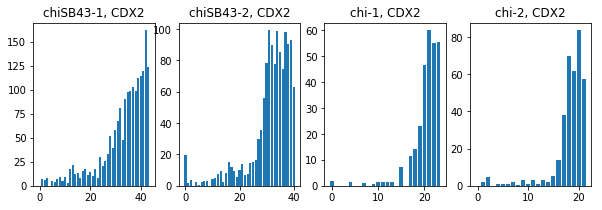

In [20]:
g = 'ENSG00000165556_CDX2__13' # [idx for idx in dfu_g1[0].index if 'BRCA1' in idx]
plt.figure(figsize=(10,3))
plt.subplot(141)
plt.bar(range(len(nfdfs[0].columns)), nfdfs[0].loc[g]); plt.title('chiSB43-1, CDX2')
plt.subplot(142)
plt.bar(range(len(nfdfs[1].columns)), nfdfs[1].loc[g]); plt.title('chiSB43-2, CDX2')
plt.subplot(143)
plt.bar(range(len(nfdfs[2].columns)), nfdfs[2].loc[g]); plt.title('chi-1, CDX2')
plt.subplot(144)
plt.bar(range(len(nfdfs[3].columns)), nfdfs[3].loc[g]); plt.title('chi-2, CDX2')

path= '/Users/anna/Dropbox/gastruloids/WritingPapers/code4figures/figHuman/'
#plt.savefig(path + 'SuppFig_CDX2.pdf', bbox_inches = 'tight')

plt.show()

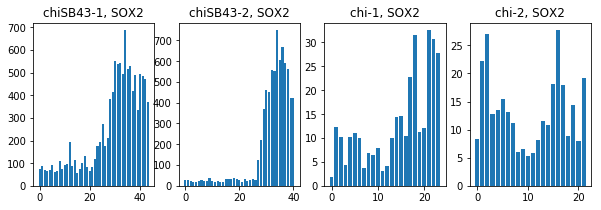

In [21]:
g = 'ENSG00000181449_SOX2__3' 
plt.figure(figsize=(10,3))
plt.subplot(141)
plt.bar(range(len(nfdfs[0].columns)), nfdfs[0].loc[g]); plt.title('chiSB43-1, SOX2')
plt.subplot(142)
plt.bar(range(len(nfdfs[1].columns)), nfdfs[1].loc[g]); plt.title('chiSB43-2, SOX2')
plt.subplot(143)
plt.bar(range(len(nfdfs[2].columns)), nfdfs[2].loc[g]); plt.title('chi-1, SOX2')
plt.subplot(144)
plt.bar(range(len(nfdfs[3].columns)), nfdfs[3].loc[g]); plt.title('chi-2, SOX2')

path= '/Users/anna/Dropbox/gastruloids/WritingPapers/code4figures/figHuman/'
#plt.savefig(path + 'SuppFig_SOX2.pdf', bbox_inches = 'tight')

plt.show()

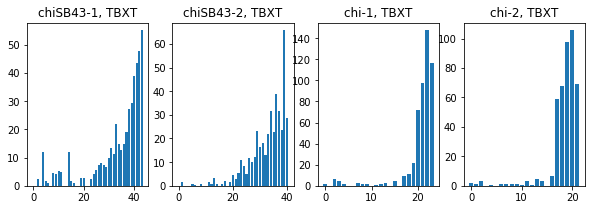

In [22]:
g = 'ENSG00000164458_TBXT__6' 
plt.figure(figsize=(10,3))
plt.subplot(141)
plt.bar(range(len(nfdfs[0].columns)), nfdfs[0].loc[g]); plt.title('chiSB43-1, TBXT')
plt.subplot(142)
plt.bar(range(len(nfdfs[1].columns)), nfdfs[1].loc[g]); plt.title('chiSB43-2, TBXT')
plt.subplot(143)
plt.bar(range(len(nfdfs[2].columns)), nfdfs[2].loc[g]); plt.title('chi-1, TBXT')
plt.subplot(144)
plt.bar(range(len(nfdfs[3].columns)), nfdfs[3].loc[g]); plt.title('chi-2, TBXT')

path= '/Users/anna/Dropbox/gastruloids/WritingPapers/code4figures/figHuman/'
#plt.savefig(path + 'SuppFig_TBXT.pdf', bbox_inches = 'tight')

plt.show()

# Store data

In [23]:
def savedfs(dfs, name):
    dfc, dfb, dft = dfs
    dfc.to_csv(name + '.coutc.tsv', sep = '\t')
    dfb.to_csv(name + '.coutb.tsv', sep = '\t')
    dft.to_csv(name + '.coutt.tsv', sep = '\t')
    return

In [24]:
savedfs(fdfs_g1, '../hG01-20umAP-120h-ChiSB43/mG01_trim_star_spliced')
savedfs(fdfs_g2, '../hG02-20umAP-120h-ChiSB43/mG02_trim_star_spliced')
savedfs(fdfs_g3, '../hG03-20umAP-72h-Chi/mG03_trim_star_spliced')
savedfs(fdfs_g4, '../hG04-20umAP-72h-Chi/mG04_trim_star_spliced')

savedfs(fdfu_g1, '../hG01-20umAP-120h-ChiSB43/mG01_trim_star_unspliced')
savedfs(fdfu_g2, '../hG02-20umAP-120h-ChiSB43/mG02_trim_star_unspliced')
savedfs(fdfu_g3, '../hG03-20umAP-72h-Chi/mG03_trim_star_unspliced')
savedfs(fdfu_g4, '../hG04-20umAP-72h-Chi/mG04_trim_star_unspliced')